In [1]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_squared_error
from numpy.linalg import norm
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

In [2]:
dn = np.load('subj1.npy', allow_pickle='TRUE')
data = dn.item()

In [3]:
data_en = data['en'] ## English 
data_sp = data['sp'] ## Spanish

In [4]:
print(len(data_en))
print(type(data_sp))

1000
<class 'numpy.ndarray'>


In [5]:
w = pd.read_csv('words.csv')

In [6]:
w.keys()

Index(['Number', 'Spanish', 'English'], dtype='object')

In [7]:
words_en = w['English'].values
words_sp = w['Spanish'].values

In [8]:
len(words_sp)

1000

In [9]:
batch_size = 32
data_en_b = []
data_sp_b = []
words_en_b = []
words_sp_b = []
n = len(data_en)
start = 0
while start < n:
    if start + batch_size >= n:
        data_en_b.append(data_en[start:])
        data_sp_b.append(data_sp[start:])
        words_en_b.append(words_en[start:])
        words_sp_b.append(words_sp[start:])
        start = start + batch_size
        break
    data_en_b.append(data_en[start:start+batch_size])
    data_sp_b.append(data_sp[start:start+batch_size])
    words_en_b.append(words_en[start:start+batch_size])
    words_sp_b.append(words_sp[start:start+batch_size])
    start = start + batch_size

In [10]:
m = LinearRegression()
r2_scores_m = []
mean_squared_error_m = []

for i in range(len(data_en_b)):
    y_en = np.arange(len(words_en_b[i]))
    y_sp = np.arange(len(words_sp_b[i]))
    m.fit(data_en_b[i], y_en)
    y_pred = m.predict(data_sp_b[i])
    for i in range(len(y_pred)):
        y_pred[i] = round(y_pred[i])
    r2_scores_m.append(r2_score(y_sp,y_pred))
    mean_squared_error_m.append(np.sqrt(mean_squared_error(y_sp,y_pred)))
    
print("Done")

Done


In [11]:
ml = Lasso(alpha=0.01, max_iter=3000)
r2_scores_ml = []
mean_squared_error_ml = []

for i in range(len(data_en_b)):
    y_en = np.arange(len(words_en_b[i]))
    y_sp = np.arange(len(words_sp_b[i]))
    ml.fit(data_en_b[i], y_en)
    y_pred_l = ml.predict(data_sp_b[i])
    for i in range(len(y_pred_l)):
        y_pred_l[i] = round(y_pred_l[i])
    r2_scores_ml.append(r2_score(y_sp,y_pred_l))
    mean_squared_error_ml.append(np.sqrt(mean_squared_error(y_sp,y_pred_l)))
    
print("Done")

/home/harry30225/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.635376210343502, tolerance: 0.2728
  model = cd_fast.enet_coordinate_descent(
/home/harry30225/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.64008765513009, tolerance: 0.2728
  model = cd_fast.enet_coordinate_descent(
/home/harry30225/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.512304273997671, tolerance: 0.2728
  model = cd_fast.enet_coordinate_descent(
/home/harry30225/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWa

Done


/home/harry30225/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.00346689952613, tolerance: 0.2728
  model = cd_fast.enet_coordinate_descent(
/home/harry30225/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.896907631351511, tolerance: 0.2728
  model = cd_fast.enet_coordinate_descent(
/home/harry30225/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.925290577533435, tolerance: 0.2728
  model = cd_fast.enet_coordinate_descent(
/home/harry30225/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceW

In [12]:
mr = Ridge(alpha=0.01)
r2_scores_mr = []
mean_squared_error_mr = []

for i in range(len(data_en_b)):
    y_en = np.arange(len(words_en_b[i]))
    y_sp = np.arange(len(words_sp_b[i]))
    mr.fit(data_en_b[i], y_en)
    y_pred_r = mr.predict(data_sp_b[i])
    for i in range(len(y_pred_r)):
        y_pred_r[i] = round(y_pred_r[i])
    r2_scores_mr.append(r2_score(y_sp,y_pred_r))
    mean_squared_error_mr.append(np.sqrt(mean_squared_error(y_sp,y_pred_r)))
    
print("Done")

Done


In [75]:
r2_scores_m

array([0.45544355, 0.13295455, 0.12296554, 0.19079912, 0.41174853,
       0.12186584, 0.07683284, 0.26997801, 0.14442815, 0.33009531,
       0.29583944, 0.35043988, 0.09010264, 0.14270528, 0.3644978 ,
       0.09681085, 0.13068182, 0.21215176, 0.2710044 , 0.38999267,
       0.32510997, 0.24803886, 0.36163856, 0.48123167, 0.06724707,
       0.33583211, 0.21898827, 0.24158724, 0.21059384, 0.10403226,
       0.29180718, 0.19404762])

In [76]:
mean_squared_error_m

array([14.67805547,  8.83087623,  8.58641733, 10.13117096, 14.02926629,
        8.55907778,  7.35272058, 11.67863969,  9.10357073, 12.72853585,
       12.1414193 , 13.06474263,  7.72779076,  9.06314653, 13.29209116,
        7.91063367,  8.77585466, 10.57081773, 11.69735547, 13.69477546,
       12.64478648, 11.27116065, 13.2461669 , 15.04784038,  7.06941034,
       12.82423243, 10.70776587, 11.14850046, 10.53936075,  8.10285444,
       12.07043133,  2.53105709])

In [78]:
r2_scores_ml

array([0.44915689, 0.13618035, 0.3840176 , 0.10819282, 0.66843842,
       0.13079179, 0.15427053, 0.17047287, 0.18546554, 0.23610704,
       0.25936584, 0.4588893 , 0.1166239 , 0.3001283 , 0.2372434 ,
       0.07987537, 0.16699047, 0.35097141, 0.29649927, 0.45331745,
       0.24792889, 0.20350073, 0.38128666, 0.22199413, 0.10062317,
       0.37791422, 0.16323314, 0.16251833, 0.24385997, 0.1557368 ,
       0.415011  , 0.18452381])

In [79]:
mean_squared_error_ml

array([14.58648775,  8.9083879 , 13.60147051,  8.21155817, 17.49955357,
        8.77852493,  9.33114744,  9.69415094, 10.01834255, 11.04323888,
       11.48334392, 14.72800266,  8.42754042, 12.21647197, 11.06514799,
        7.44038809,  9.61728587, 13.07341052, 12.15299603, 14.64715203,
       11.26908104, 10.39493567, 13.55861119, 10.76742773,  8.01268526,
       13.50549657,  9.53365748,  9.5176645 , 11.19186367,  9.36457754,
       14.07874062,  2.48117916])

In [81]:
r2_scores_mr

array([0.45544355, 0.13295455, 0.12296554, 0.19079912, 0.41174853,
       0.12186584, 0.07683284, 0.26997801, 0.14442815, 0.33009531,
       0.29583944, 0.35043988, 0.09010264, 0.14270528, 0.3644978 ,
       0.09681085, 0.13068182, 0.21215176, 0.2710044 , 0.38999267,
       0.32510997, 0.24803886, 0.36163856, 0.48123167, 0.06724707,
       0.33583211, 0.21898827, 0.24158724, 0.21059384, 0.10403226,
       0.29180718, 0.19404762])

In [83]:
mean_squared_error_mr

array([14.67805547,  8.83087623,  8.58641733, 10.13117096, 14.02926629,
        8.55907778,  7.35272058, 11.67863969,  9.10357073, 12.72853585,
       12.1414193 , 13.06474263,  7.72779076,  9.06314653, 13.29209116,
        7.91063367,  8.77585466, 10.57081773, 11.69735547, 13.69477546,
       12.64478648, 11.27116065, 13.2461669 , 15.04784038,  7.06941034,
       12.82423243, 10.70776587, 11.14850046, 10.53936075,  8.10285444,
       12.07043133,  2.53105709])

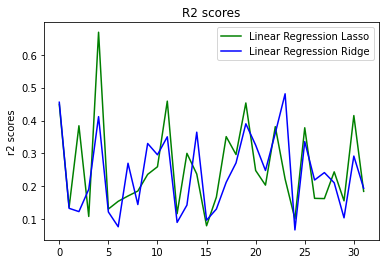

In [96]:
plt.plot(r2_scores_ml, 'g' , label='Linear Regression Lasso')
plt.plot(r2_scores_mr, 'b' , label='Linear Regression Ridge')
plt.ylabel("r2 scores")
plt.title("R2 scores")
plt.legend()

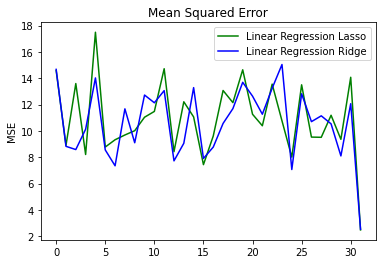

In [97]:
plt.plot(mean_squared_error_ml, 'g' , label='Linear Regression Lasso')
plt.plot(mean_squared_error_mr, 'b' , label='Linear Regression Ridge')
plt.ylabel("MSE")
plt.title("Mean Squared Error")
plt.legend()

In [15]:
### Now using bert embeddings
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distiluse-base-multilingual-cased-v2')

In [14]:
## Lets train ridge regression model on it  for english to spanish

accuracy_2v2 = []
pearson = []

for i in range(len(data_en_b)):
    y_en = []
    y_sp = []
    for j in range(len(words_en_b[i])):
        y_en.append(model.encode(words_en_b[i][j]))
        y_sp.append(model.encode(words_sp_b[i][j]))
    y_en = np.array(y_en)
    y_sp = np.array(y_sp)
    y_pred = []
    for j in range(y_en.shape[1]):
        model_ridge = Ridge(alpha=0.01)
        model_ridge.fit(data_en_b[i], y_en[:,j])
        y_pred.append(model_ridge.predict(data_sp_b[i]))
    y_pred = np.array(y_pred, dtype=float)
    y_pred = y_pred.T
    
    N = y_pred.shape[0]
    accu_2v2 = 0
    for it in range(N):
        for j in range(it+1,N):
            i1 = np.dot(y_sp[it],y_pred[it]) / (norm(y_sp[it])*norm(y_pred[it]))
            i2 = np.dot(y_sp[j],y_pred[j]) / (norm(y_sp[j])*norm(y_pred[j]))
            i3 = np.dot(y_sp[it],y_pred[j]) / (norm(y_sp[it])*norm(y_pred[j]))
            i4 = np.dot(y_sp[j],y_pred[it]) / (norm(y_sp[j])*norm(y_pred[it]))
            if i1 + i2 < i3 + i4:
                accu_2v2 += 1
    accu_2v2 = accu_2v2 / ((N*(N-1))/2)
    accuracy_2v2.append(accu_2v2)
    p = 0
    for j in range(N):
        corr, _ = pearsonr(y_sp[j], y_pred[j])
        p += corr
    p = p / N
    pearson.append(p*2)
    print("Done for Batch : " + str(i+1))
print("Done")

Done for Batch : 1
Done for Batch : 2
Done for Batch : 3
Done for Batch : 4
Done for Batch : 5
Done for Batch : 6
Done for Batch : 7
Done for Batch : 8
Done for Batch : 9
Done for Batch : 10
Done for Batch : 11
Done for Batch : 12
Done for Batch : 13
Done for Batch : 14
Done for Batch : 15
Done for Batch : 16
Done for Batch : 17
Done for Batch : 18
Done for Batch : 19
Done for Batch : 20
Done for Batch : 21
Done for Batch : 22
Done for Batch : 23
Done for Batch : 24
Done for Batch : 25
Done for Batch : 26
Done for Batch : 27
Done for Batch : 28
Done for Batch : 29
Done for Batch : 30
Done for Batch : 31
Done for Batch : 32
Done


[]

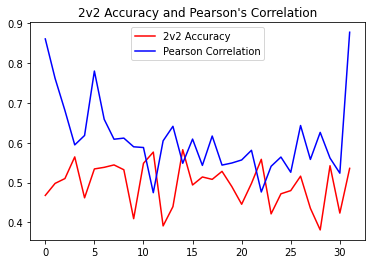

In [17]:
plt.plot(accuracy_2v2, 'r', label="2v2 Accuracy")
plt.plot(pearson , 'b' , label = "Pearson Correlation")
plt.title("2v2 Accuracy and Pearson's Correlation")
plt.legend()
plt.plot()

In [25]:
### Now using random forest regressor ennglish to spanish


accuracy_2v2_rf = []
pearson_rf = []

for i in range(len(data_en_b)):
    y_en = []
    y_sp = []
    for j in range(len(words_en_b[i])):
        y_en.append(model.encode(words_en_b[i][j]))
        y_sp.append(model.encode(words_sp_b[i][j]))
    y_en = np.array(y_en)
    y_sp = np.array(y_sp)
    y_pred = []
    for j in range(y_en.shape[1]):
        model_rf = RandomForestRegressor(max_depth=None, random_state=0)
        model_rf.fit(data_en_b[i], y_en[:,j])
        y_pred.append(model_rf.predict(data_sp_b[i]))
    y_pred = np.array(y_pred, dtype=float)
    y_pred = y_pred.T
    
    N = y_pred.shape[0]
    accu_2v2 = 0
    for it in range(N):
        for j in range(it+1,N):
            i1 = np.dot(y_sp[it],y_pred[it]) / (norm(y_sp[it])*norm(y_pred[it]))
            i2 = np.dot(y_sp[j],y_pred[j]) / (norm(y_sp[j])*norm(y_pred[j]))
            i3 = np.dot(y_sp[it],y_pred[j]) / (norm(y_sp[it])*norm(y_pred[j]))
            i4 = np.dot(y_sp[j],y_pred[it]) / (norm(y_sp[j])*norm(y_pred[it]))
            if i1 + i2 < i3 + i4:
                accu_2v2 += 1
    accu_2v2 = accu_2v2 / ((N*(N-1))/2)
    accuracy_2v2_rf.append(accu_2v2)
    p = 0
    for j in range(N):
        corr, _ = pearsonr(y_sp[j], y_pred[j])
        p += corr
    p = p / N
    pearson_rf.append(p)
    print("Done for Batch : " + str(i+1))
print("Done")

Done for Batch : 1
Done for Batch : 2
Done for Batch : 3
Done for Batch : 4
Done for Batch : 5
Done for Batch : 6
Done for Batch : 7
Done for Batch : 8
Done for Batch : 9
Done for Batch : 10
Done for Batch : 11
Done for Batch : 12
Done for Batch : 13
Done for Batch : 14
Done for Batch : 15
Done for Batch : 16
Done for Batch : 17
Done for Batch : 18
Done for Batch : 19
Done for Batch : 20
Done for Batch : 21
Done for Batch : 22
Done for Batch : 23
Done for Batch : 24
Done for Batch : 25
Done for Batch : 26
Done for Batch : 27
Done for Batch : 28
Done for Batch : 29
Done for Batch : 30
Done for Batch : 31
Done for Batch : 32
Done


In [26]:
pearson_rf

[0.7864460424040365,
 0.6687011655898653,
 0.6274331398536901,
 0.6436086619208923,
 0.6470054907056585,
 0.6649441186712325,
 0.5804833043268613,
 0.585917797940315,
 0.5985553420885937,
 0.5977158977046388,
 0.6042721641625594,
 0.5970543239812409,
 0.6145828063622076,
 0.6048458646099424,
 0.6074419715675167,
 0.5758190936463248,
 0.6257344453250736,
 0.6289825787287078,
 0.5999682319733486,
 0.60634045883779,
 0.5966415895479569,
 0.5855084112768232,
 0.5933496960599224,
 0.5768144175629786,
 0.5763622228914913,
 0.5863541892896751,
 0.6231510779475877,
 0.612238262618304,
 0.5749530940971114,
 0.6169134098946719,
 0.5551042051684059,
 0.6518586694961458]

[]

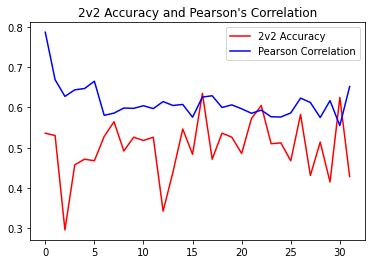

In [27]:
plt.plot(accuracy_2v2_rf, 'r', label="2v2 Accuracy")
plt.plot(pearson_rf , 'b' , label = "Pearson Correlation")
plt.title("2v2 Accuracy and Pearson's Correlation")
plt.legend()
plt.plot()

In [35]:
### Now using bagging regressor english to spanish


accuracy_2v2_bg = []
pearson_bg = []

for i in range(len(data_en_b)):
    y_en = []
    y_sp = []
    for j in range(len(words_en_b[i])):
        y_en.append(model.encode(words_en_b[i][j]))
        y_sp.append(model.encode(words_sp_b[i][j]))
    y_en = np.array(y_en)
    y_sp = np.array(y_sp)
    y_pred = []
    for j in range(y_en.shape[1]):
        model_bg = BaggingRegressor(base_estimator=SVR(),n_estimators=100, random_state=0)
        model_bg.fit(data_en_b[i], y_en[:,j])
        y_pred.append(model_bg.predict(data_sp_b[i]))
    y_pred = np.array(y_pred, dtype=float)
    y_pred = y_pred.T
    
    N = y_pred.shape[0]
    accu_2v2 = 0
    for it in range(N):
        for j in range(it+1,N):
            i1 = np.dot(y_sp[it],y_pred[it]) / (norm(y_sp[it])*norm(y_pred[it]))
            i2 = np.dot(y_sp[j],y_pred[j]) / (norm(y_sp[j])*norm(y_pred[j]))
            i3 = np.dot(y_sp[it],y_pred[j]) / (norm(y_sp[it])*norm(y_pred[j]))
            i4 = np.dot(y_sp[j],y_pred[it]) / (norm(y_sp[j])*norm(y_pred[it]))
            if i1 + i2 < i3 + i4:
                accu_2v2 += 1
    accu_2v2 = accu_2v2 / ((N*(N-1))/2)
    accuracy_2v2_bg.append(accu_2v2)
    p = 0
    for j in range(N):
        corr, _ = pearsonr(y_sp[j], y_pred[j])
        p += corr
    p = p / N
    pearson_bg.append(p)
    print("Done for Batch : " + str(i+1))
print("Done")

Done for Batch : 1
Done for Batch : 2
Done for Batch : 3
Done for Batch : 4
Done for Batch : 5
Done for Batch : 6
Done for Batch : 7
Done for Batch : 8
Done for Batch : 9
Done for Batch : 10
Done for Batch : 11
Done for Batch : 12
Done for Batch : 13
Done for Batch : 14
Done for Batch : 15
Done for Batch : 16
Done for Batch : 17
Done for Batch : 18
Done for Batch : 19
Done for Batch : 20
Done for Batch : 21
Done for Batch : 22
Done for Batch : 23
Done for Batch : 24
Done for Batch : 25
Done for Batch : 26
Done for Batch : 27
Done for Batch : 28
Done for Batch : 29
Done for Batch : 30
Done for Batch : 31
Done for Batch : 32
Done


In [36]:
accuracy_2v2_bg

[0.4959677419354839,
 0.3649193548387097,
 0.38306451612903225,
 0.6512096774193549,
 0.4435483870967742,
 0.5362903225806451,
 0.45564516129032256,
 0.5665322580645161,
 0.5120967741935484,
 0.40524193548387094,
 0.5241935483870968,
 0.4334677419354839,
 0.3911290322580645,
 0.4939516129032258,
 0.4092741935483871,
 0.4254032258064516,
 0.4536290322580645,
 0.5241935483870968,
 0.6048387096774194,
 0.657258064516129,
 0.4435483870967742,
 0.4737903225806452,
 0.6290322580645161,
 0.530241935483871,
 0.6491935483870968,
 0.4899193548387097,
 0.4112903225806452,
 0.5342741935483871,
 0.4838709677419355,
 0.4173387096774194,
 0.5,
 0.75]

[]

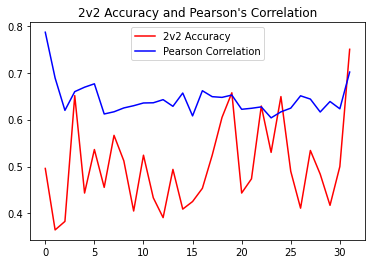

In [38]:
plt.plot(accuracy_2v2_bg, 'r', label="2v2 Accuracy")
plt.plot(pearson_bg , 'b' , label = "Pearson Correlation")
plt.title("2v2 Accuracy and Pearson's Correlation")
plt.legend()
plt.plot()

In [24]:
## Lets train ridge regression model on it  for spanish to english

accuracy_2v2_s2e = []
pearson_s2e = []

for i in range(len(data_en_b)):
    y_en = []
    y_sp = []
    for j in range(len(words_en_b[i])):
        y_en.append(model.encode(words_en_b[i][j]))
        y_sp.append(model.encode(words_sp_b[i][j]))
    y_en = np.array(y_en)
    y_sp = np.array(y_sp)
    y_pred = []
    for j in range(y_sp.shape[1]):
        model_ridge = Ridge(alpha=0.01)
        model_ridge.fit(data_sp_b[i], y_sp[:,j])
        y_pred.append(model_ridge.predict(data_en_b[i]))
    y_pred = np.array(y_pred, dtype=float)
    y_pred = y_pred.T
    
    N = y_pred.shape[0]
    accu_2v2 = 0
    for it in range(N):
        for j in range(it+1,N):
            i1 = np.dot(y_en[it],y_pred[it]) / (norm(y_en[it])*norm(y_pred[it]))
            i2 = np.dot(y_en[j],y_pred[j]) / (norm(y_en[j])*norm(y_pred[j]))
            i3 = np.dot(y_en[it],y_pred[j]) / (norm(y_en[it])*norm(y_pred[j]))
            i4 = np.dot(y_en[j],y_pred[it]) / (norm(y_en[j])*norm(y_pred[it]))
            if i1 + i2 < i3 + i4:
                accu_2v2 += 1
    accu_2v2 = accu_2v2 / ((N*(N-1))/2)
    accuracy_2v2_s2e.append(accu_2v2)
    p = 0
    for j in range(N):
        corr, _ = pearsonr(y_sp[j], y_pred[j])
        p += corr
    p = p / N
    pearson_s2e.append(p)
    print("Done for Batch : " + str(i+1))
print("Done")

Done for Batch : 1
Done for Batch : 2
Done for Batch : 3
Done for Batch : 4
Done for Batch : 5
Done for Batch : 6
Done for Batch : 7
Done for Batch : 8
Done for Batch : 9
Done for Batch : 10
Done for Batch : 11
Done for Batch : 12
Done for Batch : 13
Done for Batch : 14
Done for Batch : 15
Done for Batch : 16
Done for Batch : 17
Done for Batch : 18
Done for Batch : 19
Done for Batch : 20
Done for Batch : 21
Done for Batch : 22
Done for Batch : 23
Done for Batch : 24
Done for Batch : 25
Done for Batch : 26
Done for Batch : 27
Done for Batch : 28
Done for Batch : 29
Done for Batch : 30
Done for Batch : 31
Done for Batch : 32
Done


In [25]:
accuracy_2v2_s2e

[0.5,
 0.5120967741935484,
 0.5443548387096774,
 0.592741935483871,
 0.5080645161290323,
 0.5181451612903226,
 0.5221774193548387,
 0.5120967741935484,
 0.38911290322580644,
 0.5080645161290323,
 0.5745967741935484,
 0.5100806451612904,
 0.42943548387096775,
 0.4899193548387097,
 0.5907258064516129,
 0.4576612903225806,
 0.5020161290322581,
 0.4798387096774194,
 0.5120967741935484,
 0.5362903225806451,
 0.5342741935483871,
 0.5544354838709677,
 0.5141129032258065,
 0.4012096774193548,
 0.5604838709677419,
 0.4657258064516129,
 0.45564516129032256,
 0.5080645161290323,
 0.39314516129032256,
 0.48588709677419356,
 0.4415322580645161,
 0.5]

[]

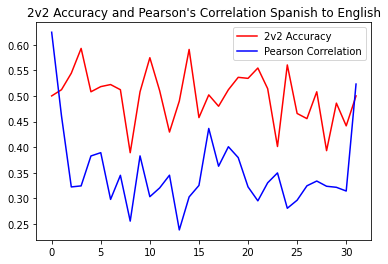

In [26]:
plt.plot(accuracy_2v2_s2e, 'r', label="2v2 Accuracy")
plt.plot(pearson_s2e , 'b' , label = "Pearson Correlation")
plt.title("2v2 Accuracy and Pearson's Correlation Spanish to English")
plt.legend()
plt.plot()

In [27]:
### Now using random forest regressor spanish ---> english


accuracy_2v2_rf_s2e = []
pearson_rf_s2e = []

for i in range(len(data_en_b)):
    y_en = []
    y_sp = []
    for j in range(len(words_en_b[i])):
        y_en.append(model.encode(words_en_b[i][j]))
        y_sp.append(model.encode(words_sp_b[i][j]))
    y_en = np.array(y_en)
    y_sp = np.array(y_sp)
    y_pred = []
    for j in range(y_sp.shape[1]):
        model_rf = RandomForestRegressor(max_depth=None, random_state=0)
        model_rf.fit(data_sp_b[i], y_sp[:,j])
        y_pred.append(model_rf.predict(data_en_b[i]))
    y_pred = np.array(y_pred, dtype=float)
    y_pred = y_pred.T
    
    N = y_pred.shape[0]
    accu_2v2 = 0
    for it in range(N):
        for j in range(it+1,N):
            i1 = np.dot(y_en[it],y_pred[it]) / (norm(y_en[it])*norm(y_pred[it]))
            i2 = np.dot(y_en[j],y_pred[j]) / (norm(y_en[j])*norm(y_pred[j]))
            i3 = np.dot(y_en[it],y_pred[j]) / (norm(y_en[it])*norm(y_pred[j]))
            i4 = np.dot(y_en[j],y_pred[it]) / (norm(y_en[j])*norm(y_pred[it]))
            if i1 + i2 < i3 + i4:
                accu_2v2 += 1
    accu_2v2 = accu_2v2 / ((N*(N-1))/2)
    accuracy_2v2_rf_s2e.append(accu_2v2)
    p = 0
    for j in range(N):
        corr, _ = pearsonr(y_sp[j], y_pred[j])
        p += corr
    p = p / N
    pearson_rf_s2e.append(p)
    print("Done for Batch : " + str(i+1))
print("Done")

Done for Batch : 1
Done for Batch : 2
Done for Batch : 3
Done for Batch : 4
Done for Batch : 5
Done for Batch : 6
Done for Batch : 7
Done for Batch : 8
Done for Batch : 9
Done for Batch : 10
Done for Batch : 11
Done for Batch : 12
Done for Batch : 13
Done for Batch : 14
Done for Batch : 15
Done for Batch : 16
Done for Batch : 17
Done for Batch : 18
Done for Batch : 19
Done for Batch : 20
Done for Batch : 21
Done for Batch : 22
Done for Batch : 23
Done for Batch : 24
Done for Batch : 25
Done for Batch : 26
Done for Batch : 27
Done for Batch : 28
Done for Batch : 29
Done for Batch : 30
Done for Batch : 31
Done for Batch : 32
Done


In [28]:
accuracy_2v2_rf_s2e

[0.49798387096774194,
 0.4959677419354839,
 0.32661290322580644,
 0.3649193548387097,
 0.5141129032258065,
 0.43951612903225806,
 0.5443548387096774,
 0.5584677419354839,
 0.4899193548387097,
 0.5,
 0.4879032258064516,
 0.45564516129032256,
 0.4254032258064516,
 0.4798387096774194,
 0.532258064516129,
 0.47580645161290325,
 0.5564516129032258,
 0.5685483870967742,
 0.5040322580645161,
 0.532258064516129,
 0.4657258064516129,
 0.5786290322580645,
 0.594758064516129,
 0.5604838709677419,
 0.5544354838709677,
 0.4475806451612903,
 0.5282258064516129,
 0.5221774193548387,
 0.46774193548387094,
 0.41935483870967744,
 0.5463709677419355,
 0.35714285714285715]

[]

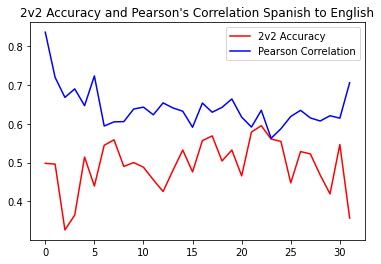

In [30]:
plt.plot(accuracy_2v2_rf_s2e, 'r', label="2v2 Accuracy")
plt.plot(pearson_rf_s2e , 'b' , label = "Pearson Correlation")
plt.title("2v2 Accuracy and Pearson's Correlation Spanish to English")
plt.legend()
plt.plot()

In [31]:
### Now using bagging regressor spanish -> english


accuracy_2v2_bg_s2e = []
pearson_bg_s2e = []

for i in range(len(data_en_b)):
    y_en = []
    y_sp = []
    for j in range(len(words_en_b[i])):
        y_en.append(model.encode(words_en_b[i][j]))
        y_sp.append(model.encode(words_sp_b[i][j]))
    y_en = np.array(y_en)
    y_sp = np.array(y_sp)
    y_pred = []
    for j in range(y_en.shape[1]):
        model_bg = BaggingRegressor(base_estimator=SVR(),n_estimators=100, random_state=0)
        model_bg.fit(data_sp_b[i], y_sp[:,j])
        y_pred.append(model_bg.predict(data_en_b[i]))
    y_pred = np.array(y_pred, dtype=float)
    y_pred = y_pred.T
    
    N = y_pred.shape[0]
    accu_2v2 = 0
    for it in range(N):
        for j in range(it+1,N):
            i1 = np.dot(y_en[it],y_pred[it]) / (norm(y_en[it])*norm(y_pred[it]))
            i2 = np.dot(y_en[j],y_pred[j]) / (norm(y_en[j])*norm(y_pred[j]))
            i3 = np.dot(y_en[it],y_pred[j]) / (norm(y_en[it])*norm(y_pred[j]))
            i4 = np.dot(y_en[j],y_pred[it]) / (norm(y_en[j])*norm(y_pred[it]))
            if i1 + i2 < i3 + i4:
                accu_2v2 += 1
    accu_2v2 = accu_2v2 / ((N*(N-1))/2)
    accuracy_2v2_bg_s2e.append(accu_2v2)
    p = 0
    for j in range(N):
        corr, _ = pearsonr(y_sp[j], y_pred[j])
        p += corr
    p = p / N
    pearson_bg_s2e.append(p)
    print("Done for Batch : " + str(i+1))
print("Done")

Done for Batch : 1
Done for Batch : 2
Done for Batch : 3
Done for Batch : 4
Done for Batch : 5
Done for Batch : 6
Done for Batch : 7
Done for Batch : 8
Done for Batch : 9
Done for Batch : 10
Done for Batch : 11
Done for Batch : 12
Done for Batch : 13
Done for Batch : 14
Done for Batch : 15
Done for Batch : 16
Done for Batch : 17
Done for Batch : 18
Done for Batch : 19
Done for Batch : 20
Done for Batch : 21
Done for Batch : 22
Done for Batch : 23
Done for Batch : 24
Done for Batch : 25
Done for Batch : 26
Done for Batch : 27
Done for Batch : 28
Done for Batch : 29
Done for Batch : 30
Done for Batch : 31
Done for Batch : 32
Done


In [32]:
pearson_bg_s2e

[0.8359813596493388,
 0.7304583208305822,
 0.6377147462622997,
 0.6894003057392539,
 0.681072321061861,
 0.7103806293980569,
 0.6274758274123069,
 0.6349606068975848,
 0.6424820576549004,
 0.6494716372129435,
 0.6596521752706255,
 0.6543027862281147,
 0.6601392700197497,
 0.6530183154730025,
 0.675412917331707,
 0.615493367794784,
 0.688564377574677,
 0.6693546243581675,
 0.6596867355224971,
 0.6762074319695003,
 0.6319388829659506,
 0.641700121429584,
 0.660815407464814,
 0.6178123445218868,
 0.6235042479286065,
 0.6300023905859051,
 0.6662831815179744,
 0.6586517536940695,
 0.6313014582353994,
 0.6542359347679606,
 0.6437316841076939,
 0.7314458858554189]

[]

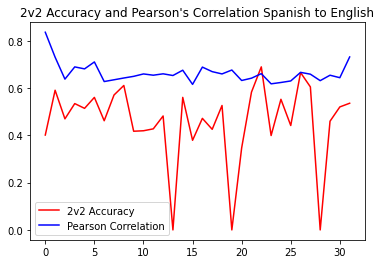

In [34]:
plt.plot(accuracy_2v2_bg_s2e, 'r', label="2v2 Accuracy")
plt.plot(pearson_bg_s2e , 'b' , label = "Pearson Correlation")
plt.title("2v2 Accuracy and Pearson's Correlation Spanish to English")
plt.legend()
plt.plot()